Linear Regression Scratch

In [1]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

In [2]:
""" 
w = [2, -3.4].T
b = 4.2
c
y = Xw + b + c
"""
def synthetic_data(w, b, num_examples):
    """Generate y = Xw + b + c"""
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b # y = Xw + b
    y += torch.normal(0, 0.01, y.shape) # Adding noise c to y
    return X, y.reshape((-1, 1))

true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

In [3]:
print('features:', features[0], '\nlabel:', labels[0])

features: tensor([-0.0518, -0.1144]) 
label: tensor([4.4917])


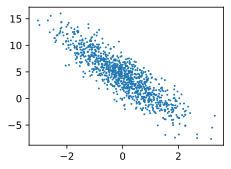

In [4]:
d2l.set_figsize()
d2l.plt.scatter(features[:, (1)].detach().numpy(),
                labels.detach().numpy(),
                1)

In [5]:
def data_iter(batch_size, features, labels):
    """
    input: batch size, feature matrices, label vectors
    output: small batch
    """
    num_examples = len(features)
    indicies = list(range(num_examples))
    random.shuffle(indicies)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(indicies[i:min(i + batch_size, num_examples)])

        yield features[batch_indices], labels[batch_indices]

batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[-0.0251, -1.4543],
        [ 0.0320, -1.0277],
        [-0.5072,  1.3605],
        [ 0.4670, -2.1513],
        [-0.2536,  0.4726],
        [ 0.3302,  0.3622],
        [-2.6797,  0.0568],
        [ 2.5487, -0.9216],
        [ 0.2786,  0.7736],
        [-0.1861, -0.1240]]) 
 tensor([[ 9.1101],
        [ 7.7591],
        [-1.4450],
        [12.4362],
        [ 2.0934],
        [ 3.6293],
        [-1.3540],
        [12.4316],
        [ 2.1205],
        [ 4.2611]])


In [6]:
"""Initialize model parameters"""
w = torch.normal(0, 0.01, size=(2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [7]:
"""Define model"""
def linreg(X, w, b):
    """Linear regression model"""
    return torch.matmul(X, w) + b

In [8]:
"""Define loss function"""
def squared_loss(y_hat, y):
    """Mean squared error (MSE) loss"""
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

In [9]:
"""Define optimization algorithm"""
def sgd(params, lr, batch_size):
    """Gradient descent based on small batch"""
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

In [10]:
"""Training process"""
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)
        l.sum().backward()
        sgd([w, b], lr, batch_size)
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

epoch 1, loss 0.030055
epoch 2, loss 0.000104
epoch 3, loss 0.000052


In [11]:
print(f'expected error of w: {true_w - w.reshape(true_w.shape)}')
print(f'expected error of b: {true_b - b}')

expected error of w: tensor([0.0002, 0.0002], grad_fn=<SubBackward0>)
expected error of b: tensor([0.0004], grad_fn=<RsubBackward1>)
